Import the required packages below:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

Read in the CSV file data/airlines.csv containing the following info:
![title](data/airlines.png)
Use it to answer the following questions:

1.Make a scatterplot of baggage vs. on time arrivals.

Text(0, 0.5, 'Percentage On Time Arrivals')

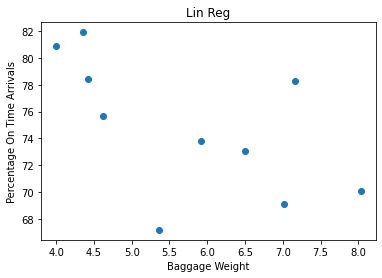

In [43]:
#insert 1
baggage = pd.read_csv('data/airlines.csv', usecols=[1])
time = pd.read_csv('data/airlines.csv', usecols=[2])
plt.scatter(baggage,time)
plt.title('Lin Reg')
plt.xlabel('Baggage Weight')
plt.ylabel('Percentage On Time Arrivals')

Text(0, 0.5, 'Percentage On Time Arrivals')

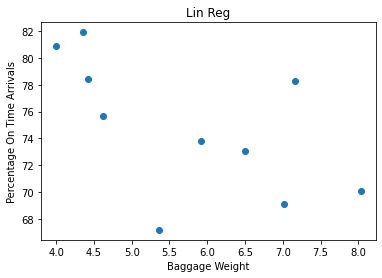

In [42]:
df = pd.read_csv('data/airlines.csv')
baggage = df['Mishandled baggage (per 1000 passengers)']
time = df['Percentage On Time Arrivals']
plt.scatter(baggage, time)
plt.title('Lin Reg')
plt.xlabel('Baggage Weight')
plt.ylabel('Percentage On Time Arrivals')

2.What is the correlation between baggage and on time arrivals?

In [4]:
#insert 2
df.corr()

,Mishandled baggage (per 1000 passengers),Percentage On Time Arrivals
Mishandled baggage (per 1000 passengers),1.000000,-0.595319
Percentage On Time Arrivals,-0.595319,1.000000


3.What are the mean and standard deviation of the X and Y variables

In [5]:
#insert 3
print(f"Baggage mean: {baggage.mean()}, Time mean: {time.mean()}")
print(f"Baggage std: {baggage.std()}, Time std: {time.std()}")

Baggage mean: 5.739, Time mean: 74.85000000000001
Baggage std: 1.3977000949973335, Time std: 5.0535466093955606


4.Calculate the line of best fit by hand (show your calculations you use below).

In [6]:
#insert 4
r = pearsonr(baggage,time)[0]
m = time.std()/baggage.std() * r
b = time.mean()-m*baggage.mean()
print(f"y_hat = {b:.2f}+{m:.2f}x")

y_hat = 87.20+-2.15x


5.Use scikit-learn to calculate the line of best fit. Print the slope and intercept.

In [7]:
#insert 5
# Create an empty model
model = LinearRegression()
x = np.array(df['Mishandled baggage (per 1000 passengers)'])
y = np.array(df['Percentage On Time Arrivals'])
x = x.reshape(-1,1)
y = y.reshape(-1,1)
# x=x.reshape(-1,1)
# y=y.reshape(-1,1)
model.fit(x,y)
# print out intercept
print('b: ', model.intercept_)
# print out other coefficients
print('m: ', model.coef_)

b:  [87.20288783]
m:  [[-2.15244604]]


6.Superimpose the line of best fit on the data.

Text(0, 0.5, 'Percentage On Time Arrivals')

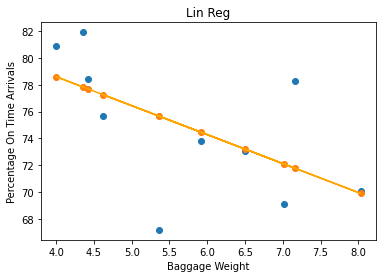

In [8]:
#insert 6
y_pred = model.predict(x)
plt.scatter(baggage, time)
plt.scatter(baggage, y_pred)
plt.plot(baggage, y_pred, color='orange')
plt.title('Lin Reg')
plt.xlabel('Baggage Weight')
plt.ylabel('Percentage On Time Arrivals')

7.Interpret the slope of your model in context.

In [9]:
#insert 7

#The increases of Baggage weight will result an 2.14 decrease for the perventage of the Time Arrivals

8.Interpret the intercept of your model in context.

In [10]:
#insert 8

#When the baggage weight is 4.0, there will be a 87 percent for the tme arrival on time.

9.Calculate and explain the meaning of your $R^2$ in context.

In [11]:
#insert 9
df1 = pd.DataFrame(y_pred)
df = df.join(df1)
r = df.corr().values[1][2]
rs = r ** 2
print(rs)

0.3544051172339229


10.Create a residual plot. Based on the residual plot, does a linear model seem appropriate?

Text(0.5, 1.0, 'Residual Plot')

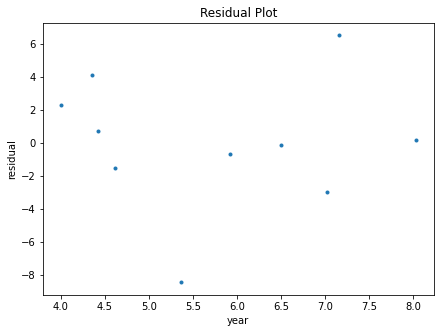

In [24]:
#insert 10
plt.figure(figsize=(7,5))
plt.plot(x,y - model.predict(x), '.');
plt.xlabel('year');
plt.ylabel('residual');
plt.title('Residual Plot')

11.Calculate the residual of American Airlines using Python syntax.

In [38]:
#insert 11
resi = y - model.predict(x)
print(resi)
# result=0
# for i in resi:
#     result += i[0]
# print(result)

[[ 4.08177691]
 [ 2.30689634]
 [ 0.71092367]
 [ 6.50862582]
 [-1.55858712]
 [-0.66040727]
 [-0.11198856]
 [ 0.18125388]
 [-2.99271662]
 [-8.46577705]]


12.As a consumer, would you prefer to fly on an airline that had a positive or negative residual? Why?

In [14]:
#insert 12

#Positive Residule, because this means the actual value shows that the overall the planes will arrive on time. 

13.What would you predict an airline with a mishandled baggage rate of 10 (per 1000 customers) to have as their ontime arrival percentage?

Text(0, 0.5, 'Baggae Weight')

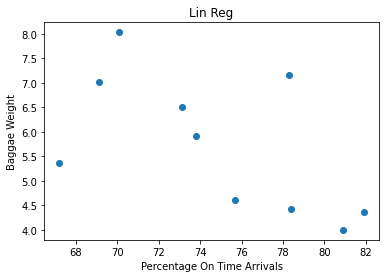

In [41]:
#Insert 13
plt.scatter(time, baggage)
plt.title('Lin Reg')
plt.xlabel('Percentage On Time Arrivals')
plt.ylabel('Baggae Weight')